In [1]:
import torch
import torch.nn as nn
from psf_estimators import *
import os
import sys
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
from fft_conv_pytorch import fft_conv, FFTConv2d
from models import *

In [2]:
HSI_image = scipy.io.loadmat('stuff_toys/test/test_stuff_toys.mat')['im']

Nz = 2
Nw = 31
Nx = 1
Ny = 1
Np = HSI_image.shape[0]


HSI_image_tensor = HSI_image.transpose(2, 0, 1)
HSI_image_tensor = np.expand_dims(HSI_image_tensor, axis=1)
HSI_image_tensor = torch.from_numpy(HSI_image_tensor)

R = scipy.io.loadmat('Sensor_25_new3.mat')["R"].flatten()
G = scipy.io.loadmat('Sensor_25_new3.mat')["G"].flatten()
B = scipy.io.loadmat('Sensor_25_new3.mat')["B"].flatten()

R_interpolated = np.interp(np.linspace(400, 700, 31), np.linspace(400, 700, 25), R)
G_interpolated = np.interp(np.linspace(400, 700, 31), np.linspace(400, 700, 25), G)
B_interpolated = np.interp(np.linspace(400, 700, 31), np.linspace(400, 700, 25), B)

doe_layer = doe_layer(Nz, Nw, Nx, Ny, Np, Np)
out = doe_layer(HSI_image_tensor, R_interpolated, G_interpolated, B_interpolated)

c:\Users\L\miniconda3\envs\pytorch_leon\lib\site-packages\torch\functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\native\TensorShape.cpp:3527.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


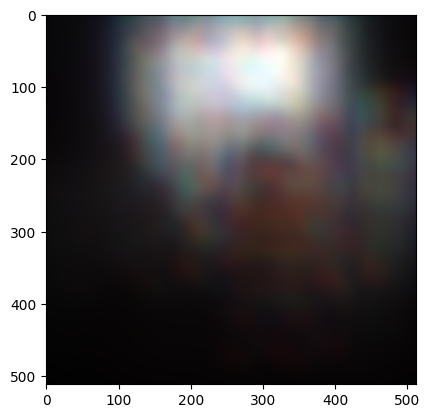

In [4]:
plt.imshow(out)
plt.show()